# **Graded Challenge 3**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Graded Challenge : Graded Challenge 3

## **1.2 Query**

> Pada Graded Challenge ini data diperoleh dari Project ID `ftds-hacktiv8-project` Dataset Name `phase1_ftds_002_hck` dan Table Name `heart-failure` dengan query sebagai berikut:

> SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.heart-failure`

## **1.3 Objective**

> Pada Graded Challenge ini akan dilakukan pembuatan model machine learning Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah diperoleh.

# **2. Import Libraries** 

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 8.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import  MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

> Cell di atas merupakan daftar *library* yang digunakan dalam Graded Challenge ini

# **3. Data Loading** 

In [3]:
df = pd.read_csv('h8dsft_P1G3_Ropiudin.csv.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.000,1,250,1,15,0,213000.000,1.300,136,0,0,65,1
1,46.000,0,168,1,17,1,271000.000,2.100,124,0,0,100,1
2,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8,1
3,53.000,1,91,0,20,1,418000.000,1.400,139,0,0,43,1
4,50.000,1,582,1,20,1,279000.000,1.000,134,0,0,186,0


In [5]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.000,1,122,1,60,0,267000.000,1.200,145,1,0,147,0
295,45.000,0,308,1,60,1,377000.000,1.000,136,1,0,186,0
296,70.000,0,97,0,60,1,220000.000,0.900,138,1,0,186,0
297,53.000,1,446,0,60,1,263358.030,1.000,139,1,0,215,0
298,50.000,0,582,0,62,1,147000.000,0.800,140,1,1,192,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

> Dari hasil diatas didapatkan informasi bahwa dataset yang digunakan terdiri dari 299 entri data atau baris dan 13 kolom, dimana disetiap kolom tidak terdapat missing values

In [8]:
df[df.duplicated()].shape

(0, 13)

> Berdasarkan output diatas menujukan bahwa pada dataset tidak terdapat data yang duplikat

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,0.431,581.839,0.418,38.084,0.351,263358.029,1.394,136.625,0.649,0.321,130.261,0.321
std,11.895,0.496,970.288,0.494,11.835,0.478,97804.237,1.035,4.412,0.478,0.468,77.614,0.468
min,40.000,0.000,23.000,0.000,14.000,0.000,25100.000,0.500,113.000,0.000,0.000,4.000,0.000
25%,51.000,0.000,116.500,0.000,30.000,0.000,212500.000,0.900,134.000,0.000,0.000,73.000,0.000
50%,60.000,0.000,250.000,0.000,38.000,0.000,262000.000,1.100,137.000,1.000,0.000,115.000,0.000
75%,70.000,1.000,582.000,1.000,45.000,1.000,303500.000,1.400,140.000,1.000,1.000,203.000,1.000
max,95.000,1.000,7861.000,1.000,80.000,1.000,850000.000,9.400,148.000,1.000,1.000,285.000,1.000


> Dilihat dari describe dari dataset, tidak terdapat data yang mendefinisikan sebagai data missing values, seperti data 99999. Sehingga dapat disimpulkan dataset bersih dari missing values

> Dan dari hasil diatas juga, terdapat kolom yang memiliki nilai biner, yaitu 0 dan 1. Sehingga kolom yang memiliki nilai biner dapat diartikan sebagai kolom kategorik

Berikut deskripsi disetiap kolom pada dataset berdasarkan sumber dari kaggle:


| Feature | Penjelasan | Pengukuran | Range |
| ----------- | :---------: | ----------: | ----------: |
| Age | Usia pasien | Tahun | [40,…, 95] |
| Anaemia | Penurunan sel darah merah atau hemoglobin | Boolean | 0 , 1 |
| High blood pressure | Jika pasien menderita hipertensi | Boolean  | 0 , 1 |
| Creatinine phosphokinase (CPK) | Tingkat enzim CPK dalam darah | mcg/L | [23,…, 7861] |
| Diabetes | Jika pasien menderita diabetes | Boolean | 0 , 1 |
| Ejection fraction  | Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase) | Persentase | [14,…, 80] |
| Sex  | Wanita atau pria | Biner | 0 , 1 |
| Platelets  | Trombosit dalam darah | kiloplatelets/mL | [25.01,…, 850.00] |
| Serum creatinine  | Tingkat kreatinin dalam darah | mg/dL | [0.50,…, 9.40] |
| Serum sodium  | Tingkat natrium dalam darah | mEq/L | [113,…, 148] |
| Smoking  | Jika pasien merokok | Boolean | 0 , 1 |
| Time | follow-up period| Hari | [4,…,285]  |
| DEATH_EVENT  | Jika pasien meninggal selama follow-up period | Boolean  | 0 , 1 |

> Boolean features dari dataset
* Sex - Jenis kelamin pasien Pria = 1, Wanita = 0
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

> Feature diatas akan didefinisikan sebagai kolom kategorik

> Dibawah merupakan pengelompokan data numerik dan kategorik, yang nantinya digunakan untuk ke tahapan selanjutnya

In [10]:
num_col = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_col = ['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking', 'DEATH_EVENT']

In [11]:
# numeric overview
df[num_col].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,581.839,38.084,263358.029,1.394,136.625,130.261
std,11.895,970.288,11.835,97804.237,1.035,4.412,77.614
min,40.000,23.000,14.000,25100.000,0.500,113.000,4.000
25%,51.000,116.500,30.000,212500.000,0.900,134.000,73.000
50%,60.000,250.000,38.000,262000.000,1.100,137.000,115.000
75%,70.000,582.000,45.000,303500.000,1.400,140.000,203.000
max,95.000,7861.000,80.000,850000.000,9.400,148.000,285.000


In [12]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

anaemia

0    170
1    129
Name: anaemia, dtype: int64
----------
diabetes

0    174
1    125
Name: diabetes, dtype: int64
----------
high_blood_pressure

0    194
1    105
Name: high_blood_pressure, dtype: int64
----------
sex

1    194
0    105
Name: sex, dtype: int64
----------
smoking

0    203
1     96
Name: smoking, dtype: int64
----------
DEATH_EVENT

0    203
1     96
Name: DEATH_EVENT, dtype: int64
----------


# **4. Data Cleaning** 

In [13]:
df_clean = df.copy()
df_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.000,1,250,1,15,0,213000.000,1.300,136,0,0,65,1
1,46.000,0,168,1,17,1,271000.000,2.100,124,0,0,100,1
2,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8,1
3,53.000,1,91,0,20,1,418000.000,1.400,139,0,0,43,1
4,50.000,1,582,1,20,1,279000.000,1.000,134,0,0,186,0


 > Dikarnakan dataset sudah bersih dari missing values dan dari data duplikat serta tidak adanya perubahan yang ingin dilakukan pada dataset sehingga data sudah dinyatakan bersih dan akan diproses ke tahap selanjutnya 

# **5. Exploratory Data Analysis (EDA)** 

In [20]:
df_clean['DEATH_EVENT'].value_counts().reset_index()

,index,DEATH_EVENT
0,0,203
1,1,96


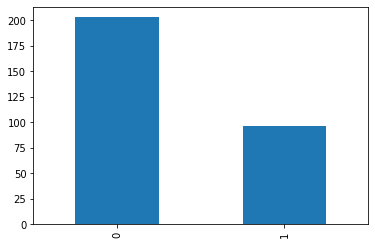

In [21]:
df_clean['DEATH_EVENT'].value_counts().plot(kind='bar')

> Berdasarka tabel dan grafik diatas terdapat lebih banyak pasien yang tidak meninggal selama follow-up period yaitu label 0, di bandingkan pasien yang meninggal selama follow-up period yaitu label 1

> Yang terdapat 203 pasien yang tidak meninggal selama follow-up period dan 96 pasien yang meninggal selama follow-up period

> Kolom DEATH_EVENT merupakan kolom yang ditetapkan sebagai target dan terdapat imbalance pada data

In [22]:
df_DE_0 = df_clean[
    (df_clean['DEATH_EVENT'] == 0) 
].groupby(['smoking'])['DEATH_EVENT'].count().sort_values(ascending=False).reset_index()
df_DE_0

,smoking,DEATH_EVENT
0,0,137
1,1,66


In [23]:
df_DE_1 = df_clean[
    (df_clean['DEATH_EVENT'] == 1) 
].groupby(['smoking'])['DEATH_EVENT'].count().sort_values(ascending=False).reset_index()
df_DE_1

,smoking,DEATH_EVENT
0,0,66
1,1,30


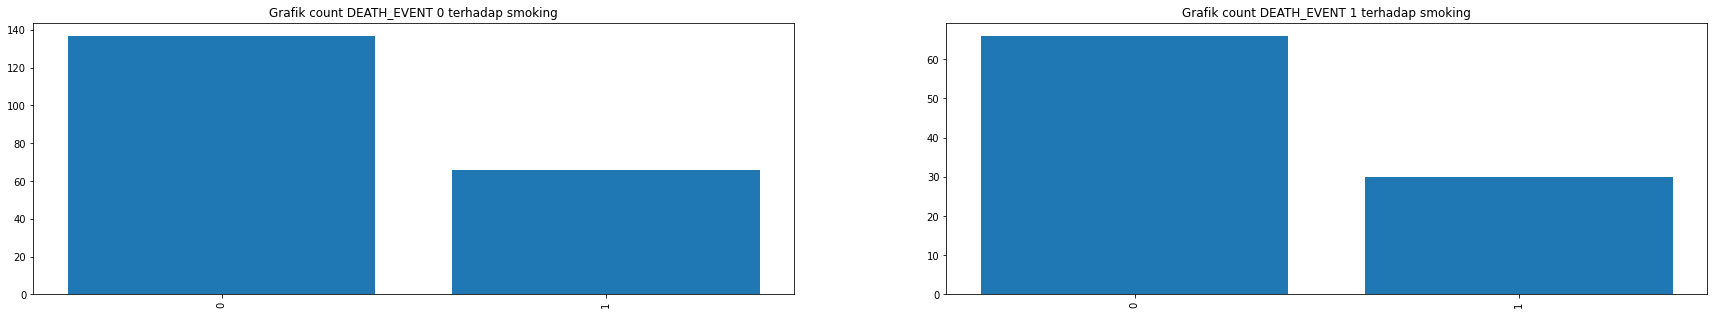

In [24]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.bar(x=df_DE_0['smoking'], height=df_DE_0['DEATH_EVENT'])
plt.xticks(df_DE_0['smoking'])
plt.title('Grafik count DEATH_EVENT 0 terhadap smoking')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.bar(x=df_DE_1['smoking'], height=df_DE_1['DEATH_EVENT'])
plt.xticks(df_DE_1['smoking'])
plt.title('Grafik count DEATH_EVENT 1 terhadap smoking')
plt.xticks(rotation = 90)
plt.show()

> Berdasarkan tabel dan grafik diatas, diketahui bahwa pada pasien yang tidak meninggal selama follow-up period lebih banyak pasien yang tidak merokok yaitu sebanyak 137 pasien sedangkan pasien yang merokok yaitu sebanyak 66 pasien

> Pada pasien yang meninggal selama follow-up period lebih banyak yang tidak merokok yaitu sebanyak 66 pasien sedangkan pasien yang merokok yaitu sebanyak 30 pasien

> Sehingga dapat ditarik kesimpulan bahwa merokok bukan salah satu faktor terbesar yang menyebabkan pasien meninggal selama follow-up period 

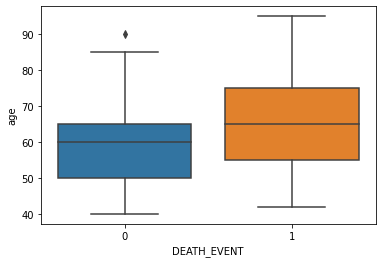

In [25]:
sns.boxplot(data=df_clean, x='DEATH_EVENT', y='age')

> Berdasarkan boxplot antara kolom DEATH_EVENT dan age diperoleh informasi bahwa secara visual terdapat outlier pada label 0, dan penyebaran age pada label 1 terbilang merata atau berdistribusi normal 

# **6. Data Preprocessing** 

### **Splitting between `X` (Features), `y` (Target) and `inf` (Inference)**

> Pada tahapan ini akan dilakukan pembagian data pada dataset menjadi 3 data, yaitu data inference, data train dan data test

In [26]:
df_inf = df_clean.sample(5,random_state=0)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
206,75.000,1,81,0,38,1,368000.000,4.000,131,1,1,10,1
188,65.000,0,198,1,35,1,281000.000,0.900,137,1,1,146,0
12,65.000,0,56,0,25,0,237000.000,5.000,130,0,0,207,0
219,53.000,1,707,0,38,0,330000.000,1.400,137,1,1,209,0
237,75.000,0,582,0,40,0,263358.030,1.180,137,1,0,107,0


In [27]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.000,1,250,1,15,0,213000.000,1.300,136,0,0,65,1
1,46.000,0,168,1,17,1,271000.000,2.100,124,0,0,100,1
2,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8,1
3,53.000,1,91,0,20,1,418000.000,1.400,139,0,0,43,1
4,50.000,1,582,1,20,1,279000.000,1.000,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.000,1,122,1,60,0,267000.000,1.200,145,1,0,147,0
295,45.000,0,308,1,60,1,377000.000,1.000,136,1,0,186,0
296,70.000,0,97,0,60,1,220000.000,0.900,138,1,0,186,0
297,53.000,1,446,0,60,1,263358.030,1.000,139,1,0,215,0


In [28]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,1,81,0,38,1,368000.000,4.000,131,1,1,10,1
1,65.000,0,198,1,35,1,281000.000,0.900,137,1,1,146,0
2,65.000,0,56,0,25,0,237000.000,5.000,130,0,0,207,0
3,53.000,1,707,0,38,0,330000.000,1.400,137,1,1,209,0
4,75.000,0,582,0,40,0,263358.030,1.180,137,1,0,107,0


> Stap diatas merupakan pengambilan data inference dari dataset, yang mana data inferene ini akan digunakan pada model inference yang bertujuan untuk menguji model yang sudah dibuat berfungi atau tidak ketikan dimasukan data baru selain data train dan data test

In [29]:
# define feature and target
X = df_clean.drop('DEATH_EVENT', axis=1)
y = df_clean['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(205, 12)
(89, 12)
(205,)
(89,)


In [31]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(205, 13)

> Dataset yang sudah dipisahkan dari data inference, selenjautnya dibagi menjadi data train dan data test, yang mana pada pembagian ini saya menggunakan pembagian data sebanyak 70% data train dan 30% data test

## **6.1 Exploratory Data Analysis (EDA) - Modeling**

In [32]:
num_col = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_col = ['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking', 'DEATH_EVENT']

>  Exploratory Data Analysis (EDA) - Modeling adalah proses data preprocessing terhadat data training, dan pada tahap ini saya memisahkan kolom numerik dan kolom kategorik bertujuan untuk mempermudah peroses selanjutnya

### **Numerical Feature**

In [33]:
df_eda[num_col].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
18,57.000,129,30,395000.000,1.000,140,42
159,45.000,2442,30,334000.000,1.100,139,129
241,42.000,64,40,189000.000,0.700,140,245
122,62.000,231,25,253000.000,0.900,140,10
110,70.000,582,20,263358.030,1.830,134,31


In [34]:
df_eda[num_col].shape

(205, 7)

#### **Handling Outlier**

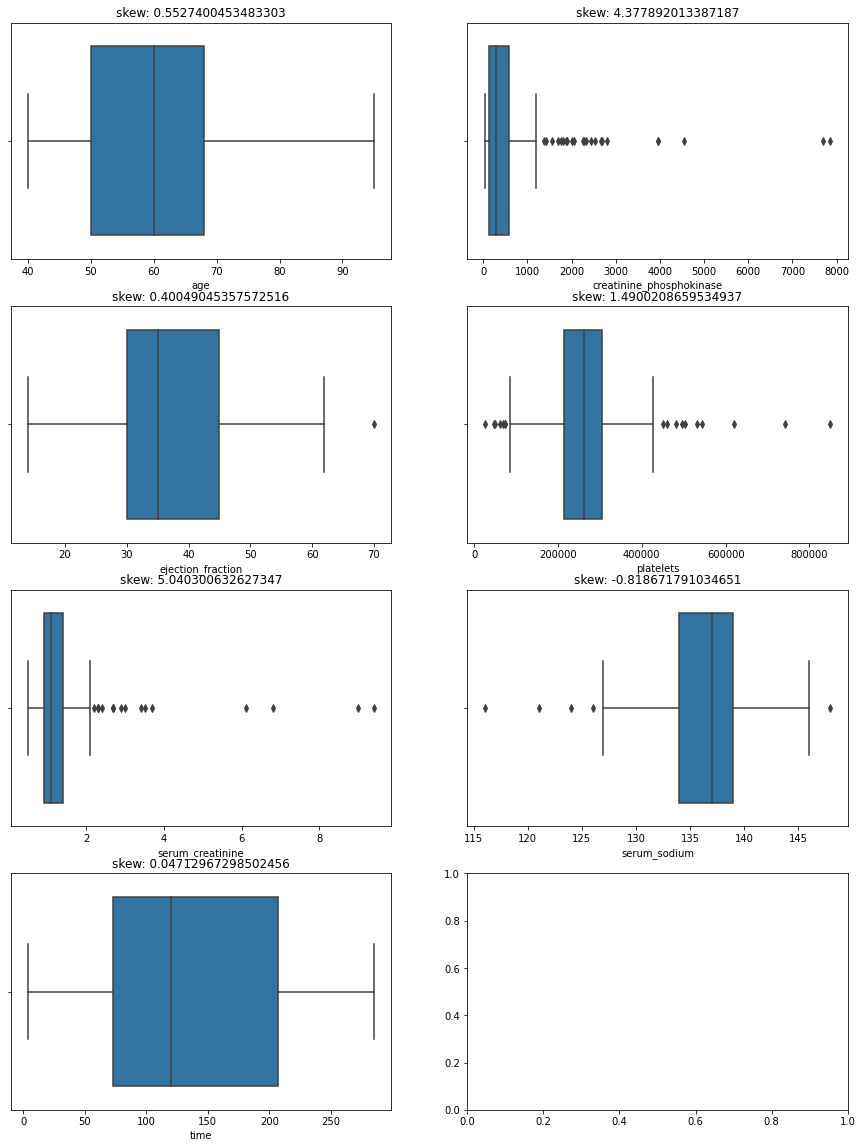

In [35]:
num_col = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, ax = plt.subplots(ncols=2,nrows=4, figsize=[15,20])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_eda[col].skew()}')

plt.show()

> Grafik boxplot diatas merupakan grafik pada kolom data numerik, dari hasil boxplot terdapat beberapa kolom memiliki outlier akan tetapi belum diketahui berapa banyak outlier disetiap kolomnya, tahapan dibawah ini akan melihat seberapa banyak outlier disetiap kolom numerik

> Dan dari boxplot diatas juga diketahui nilai skew disetiap kolom, yang mana disetiap kolom rata - rata memiliki ditribusi yang tidak normal atau skew, hal ini berguna untuk menentukan penggunaan handling outlier dan scaling

In [36]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)
    
  no_outliers = df_eda[(df_eda[col]>=lower) &  (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_eda,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_eda))*100, '%') 
    print('-'*10)

age
count of outlier:  0
percentage of outlier:  0.0 %
----------
creatinine_phosphokinase
count of outlier:  15
percentage of outlier:  7.317073170731707 %
----------
ejection_fraction
count of outlier:  0
percentage of outlier:  0.0 %
----------
platelets
count of outlier:  3
percentage of outlier:  1.4634146341463417 %
----------
serum_creatinine
count of outlier:  9
percentage of outlier:  4.390243902439024 %
----------
serum_sodium
count of outlier:  1
percentage of outlier:  0.4878048780487805 %
----------
time
count of outlier:  0
percentage of outlier:  0.0 %
----------


> Berdasarkan hasil outlier analysis diatas diketahui bahwa pada kolom `creatinine_phosphokinase` , `platelets` , `serum_creatinine` dan `serum_sodium` terdapat outlier. Kolom `creatinine_phosphokinase` merupakan kolom dengan outlier tertinggi yaitu sebanyak 7.31% sedangkan kolom lainnya terdapat outlier hanya di bawah 5%. Dari hasil diatas akan dilakukan handling outlier terhadap kolom yang memiliki outlier dibawah 5% dikarnakan dari outlier analysis, outlier dibawah 5% tidak terlalu banyak sehingga masih masuk akal jika dihandling dan tidak terlalu kehilangan banyak informasi, kolom yang memiliki outlier dibawah 5% yaitu kolom `platelets` , `serum_creatinine` dan `serum_sodium` dengan cara dicapping menggunakan winsorizer. Capping winsorizer berfungsi untuk mengcapping pada data testing dan inference pada tahap selanjutnya. 


In [37]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['platelets','serum_creatinine','serum_sodium'])

df_eda_cleaned = wins.fit_transform(df_eda)

> Pada capping outlier menggunakan capping metode iqr, dikarnakan kolom `platelets` , `serum_creatinine` dan `serum_sodium` tidak berdistribusi normal atau skew sehingga melakukan capping winsorizer dengan capping metode iqr

In [38]:
# Compare before and after outlier handling
print('before handling: \n', df_eda.describe())

before handling: 
           age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count 205.000  205.000                   205.000   205.000            205.000   
mean   59.740    0.439                   620.351     0.429             37.712   
std    11.667    0.497                  1016.285     0.496             11.757   
min    40.000    0.000                    30.000     0.000             14.000   
25%    50.000    0.000                   121.000     0.000             30.000   
50%    60.000    0.000                   281.000     0.000             35.000   
75%    68.000    1.000                   582.000     1.000             45.000   
max    95.000    1.000                  7861.000     1.000             70.000   

       high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
count              205.000    205.000           205.000       205.000 205.000   
mean                 0.390 267600.910             1.383       136.624   0.624   
std     

In [39]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
           age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count 205.000  205.000                   205.000   205.000            205.000   
mean   59.740    0.439                   620.351     0.429             37.712   
std    11.667    0.497                  1016.285     0.496             11.757   
min    40.000    0.000                    30.000     0.000             14.000   
25%    50.000    0.000                   121.000     0.000             30.000   
50%    60.000    0.000                   281.000     0.000             35.000   
75%    68.000    1.000                   582.000     1.000             45.000   
max    95.000    1.000                  7861.000     1.000             70.000   

       high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
count              205.000    205.000           205.000       205.000 205.000   
mean                 0.390 265220.422             1.277       136.639   0.624   
std      

> Setelah melakukan capping, selanjutnya dilihat perbedaan setelah dan sebelum capping, dari hasil diatas terlihat perbedaan pada kolom  `platelets` , `serum_creatinine` dan `serum_sodium` setelah dan sebelum dicapping, hal ini berarti capping pada kolom  `platelets` , `serum_creatinine` dan `serum_sodium` berhasil dilakukan 

### **Categorical Feature**

In [40]:
df_eda_cleaned[cat_col].head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
18,1,0,0,0,0,1
159,0,1,0,1,0,1
241,0,0,0,1,0,0
122,0,0,1,1,1,1
110,0,0,1,1,1,1


> Dikarnakan pada kolom kategorik sudah di encoding ke data numerik, sehingga pada data kategorik tidak dilakukan endocing dan bisa dilanjutkan ke tahap selanjutnya yaitu feature selection

### **Feature Selection**

**Feature Selection untuk data feature numerik dengan menggunakan Correlation**

In [41]:
df_num = df_eda_cleaned[num_col + ['DEATH_EVENT']]
df_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
18,57.000,129,30,395000.000,1.000,140.000,42,1
159,45.000,2442,30,334000.000,1.100,139.000,129,1
241,42.000,64,40,189000.000,0.700,140.000,245,0
122,62.000,231,25,253000.000,0.900,140.000,10,1
110,70.000,582,20,263358.030,1.830,134.000,31,1


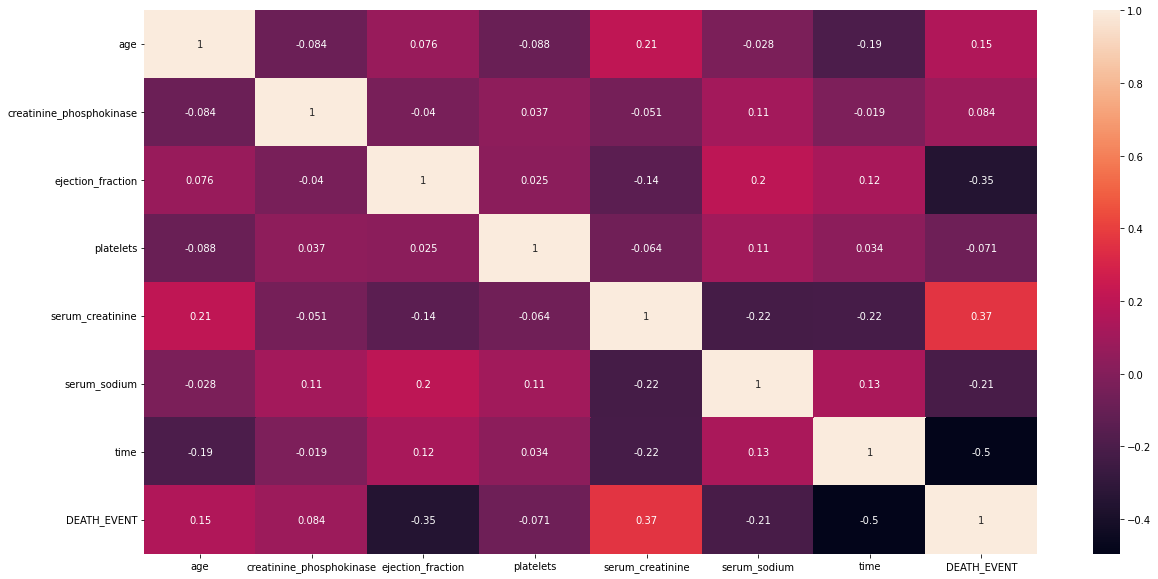

In [42]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_num.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

**Feature Selection untuk data feature kategorik dengan menggunakan Correlation**

In [43]:
df_cat = df_eda_cleaned[cat_col]
df_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
18,1,0,0,0,0,1
159,0,1,0,1,0,1
241,0,0,0,1,0,0
122,0,0,1,1,1,1
110,0,0,1,1,1,1


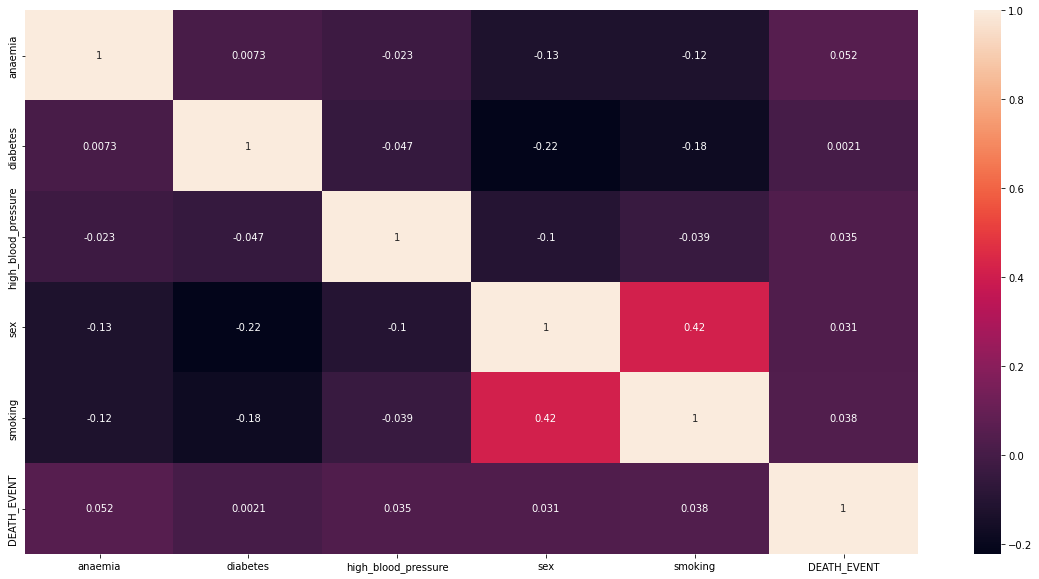

In [44]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [45]:
df_eda_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
18,57.000,1,129,0,30,0,395000.000,1.000,140.000,0,0,42,1
159,45.000,0,2442,1,30,0,334000.000,1.100,139.000,1,0,129,1
241,42.000,0,64,0,40,0,189000.000,0.700,140.000,1,0,245,0
122,62.000,0,231,0,25,1,253000.000,0.900,140.000,1,1,10,1
110,70.000,0,582,0,20,1,263358.030,1.830,134.000,1,1,31,1


> Berdasarkan feature selection dengan menggunakan correlation heatmap, ditetapkan nilai correlation lebih dari sama dengan 0.1 untuk di pilih sebagai feture. Sehingga berdasarkan hasil correlation diatas diperoleh kolom feature sebagai berikut: `age`,`ejection_fraction`,`serum_creatinine`, `serum_sodium`, `time` dan `DEATH_EVENT` sebagai target

In [46]:
df_eda_cleaned = df_eda_cleaned[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']].reset_index()
df_eda_cleaned

,index,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,18,57.000,30,1.000,140.000,42,1
1,159,45.000,30,1.100,139.000,129,1
2,241,42.000,40,0.700,140.000,245,0
3,122,62.000,25,0.900,140.000,10,1
4,110,70.000,20,1.830,134.000,31,1
...,...,...,...,...,...,...,...
200,251,75.000,45,1.180,137.000,87,0
201,192,42.000,35,1.100,139.000,201,0
202,117,59.000,20,2.400,134.000,135,1
203,47,80.000,38,1.300,135.000,130,1


### **Feature Scaling**

In [47]:
num_col = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_cleaned[num_col]))
num_scaled.columns = num_col

df_eda_cleaned.drop(num_col, axis=1, inplace=True)
df_eda_cleaned = pd.concat([df_eda_cleaned, num_scaled], axis=1)

df_eda_cleaned = df_eda_cleaned[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']]

df_eda_cleaned

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.309,0.286,0.208,0.724,0.135,1
1,0.091,0.286,0.250,0.690,0.445,1
2,0.036,0.464,0.083,0.724,0.858,0
3,0.400,0.196,0.167,0.724,0.021,1
4,0.545,0.107,0.554,0.517,0.096,1
...,...,...,...,...,...,...
200,0.636,0.554,0.283,0.621,0.295,0
201,0.036,0.375,0.250,0.690,0.701,0
202,0.345,0.107,0.792,0.517,0.466,1
203,0.727,0.429,0.333,0.552,0.448,1


> Pada tahapan Feature Scaling, kolom numerik `age`,`ejection_fraction`,`serum_creatinine`,`serum_sodium` dan `time` dilakukan scaling dengan menggunakan MinMaxScaler, dikarnakan kolom - kolom tersebut memiliki distribusi yang tidak normal atau skew. Feature scaling ini bertujuan untuk menormalisasikan data numerik, sehingga bisa diproses kepemodelan

Berdasarkan proses pada tahap Exploratory Data Analysis (EDA) - Modeling pada data traning dapat direkap sebagai berikut:
1. Handling outlier pada kolom `platelets` , `serum_creatinine` dan `serum_sodium`
2. Feature Selection dengan menetapkan correlation 0.1 sehingga diperoleh kolom `age`,`ejection_fraction`,`serum_creatinine`, `serum_sodium`, `time` sebagai feature dan `DEATH_EVENT` sebagai target
3. Feature Scaling pada kolom data numerik

## **6.2 Data Preprocessing**

Pada data preprocesing tahapan yang dilakukan sama dengan Exploratory Data Analysis (EDA) - Modeling pada data traning, hanya saja data yang digunakan pada tahapan ini adalah data testing, sehingga pada tahapan data preprocesing adalah sebagai berikut:
1. Handling outlier pada kolom `platelets` , `serum_creatinine` dan `serum_sodium`
2. Feature Selection dengan menetapkan kolom `age`,`ejection_fraction`,`serum_creatinine`, `serum_sodium`, `time` sebagai feature dan `DEATH_EVENT` sebagai target
3. Feature Scaling pada kolom data numerik

In [48]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
216,54.000,0,582,1,38,0,264000.000,1.800,134,1,0,213,0
212,63.000,0,936,0,38,0,304000.000,1.100,133,1,1,88,0
45,66.000,1,68,1,38,1,162000.000,1.000,136,0,0,95,0
230,44.000,0,84,1,40,1,235000.000,0.700,139,1,0,79,0
22,65.000,0,167,0,30,0,259000.000,0.800,138,0,0,186,0


#### **Handling Outlier**

In [49]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
216,54.000,0,582,1,38,0,264000.000,1.800,134.000,1,0,213,0
212,63.000,0,936,0,38,0,304000.000,1.100,133.000,1,1,88,0
45,66.000,1,68,1,38,1,162000.000,1.000,136.000,0,0,95,0
230,44.000,0,84,1,40,1,235000.000,0.700,139.000,1,0,79,0
22,65.000,0,167,0,30,0,259000.000,0.800,138.000,0,0,186,0


### **Feature Selection**

In [50]:
testing_cleaned = testing[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']].reset_index()
testing_cleaned

,index,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,216,54.000,38,1.800,134.000,213,0
1,212,63.000,38,1.100,133.000,88,0
2,45,66.000,38,1.000,136.000,95,0
3,230,44.000,40,0.700,139.000,79,0
4,22,65.000,30,0.800,138.000,186,0
...,...,...,...,...,...,...,...
84,146,64.000,25,2.400,135.000,214,0
85,214,75.000,38,2.500,134.000,162,1
86,223,52.000,38,1.000,140.000,258,0
87,54,90.000,38,0.900,144.000,256,0


### **Feature Scaling**

In [51]:
num_col = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis=1)

testing_cleaned = testing_cleaned[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']]

testing_cleaned

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.255,0.429,0.542,0.517,0.744,0
1,0.418,0.429,0.250,0.483,0.299,0
2,0.473,0.429,0.208,0.586,0.324,0
3,0.073,0.464,0.083,0.690,0.267,0
4,0.455,0.286,0.125,0.655,0.648,0
...,...,...,...,...,...,...
84,0.436,0.196,0.792,0.552,0.747,0
85,0.636,0.429,0.833,0.517,0.562,1
86,0.218,0.429,0.208,0.724,0.904,0
87,0.909,0.429,0.167,0.862,0.897,0


In [52]:
X_train = df_eda_cleaned.drop('DEATH_EVENT',axis=1).copy()
y_train = df_eda_cleaned['DEATH_EVENT']

X_test = testing_cleaned.drop('DEATH_EVENT',axis=1).copy()
y_test = testing_cleaned['DEATH_EVENT']

# **7. Modeling** 

## **7.1. Model Definition**

In [53]:
rnd_model = RandomForestClassifier(random_state=0)
ada_model = AdaBoostClassifier(random_state=0)

> Pada tahap model definition, model yang digunakan adalah Random Forest dan AdaBoost yang merupakan salah satu algoritma dari Boosting, dan akan dibandingkan dari masing - masing model, sebelum dan sesudah dilakukan hyperparameter tuning, sehingga diperoleh parameter terbaik yang nantinya akan digunakan untuk model inference

## **7.2. Model Training**

In [65]:
# Random Forest
rnd_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [66]:
# AdaBoost
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

> Pada tahap model traning, dilakukan traning dimasing - masing model yang digunakan 

## **7.3. Model Evaluation**

### **Hyperparameter Tuning**

> Dilakukannya hyperparameter tuning bertujuan untuk mendapatkan parameter terbaik dari model, dan pada hyperparameter tuning ini scoring yang saya gunakan adalah recall, dikarnakan pada kasus dataset ini ingin difokuskan mengurangi kesalahan negatif yang mana label 1 pada kolom DEATH_EVENT didefinisikan sebagai kelas positif dan label 1 memiliki arti pasien yang meninggal selama follow-up period. Sehingga kesalahan fatal jika prediksi yang seharusnya diprediksi sebagai label 1 malah diprediksi label 0. 

**Hyperparameter Tuning Random Forest**

In [56]:
params_rnd = [
    {'n_estimators': [20, 40, 60, 80, 100],        
     'max_features': [5, 10, 15, 20, 25],           
     'max_depth': [3, 6, 9, 12, 15],              
     'criterion': ['gini', 'entropy']}]

rnd_model = RandomForestClassifier(random_state=0)

grid_search_rnd = GridSearchCV(rnd_model, params_rnd, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search_rnd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 6, 9, 12, 15],
                          'max_features': [5, 10, 15, 20, 25],
                          'n_estimators': [20, 40, 60, 80, 100]}],
             return_train_score=True, scoring='recall')

> Code diatas merupakan code untuk melalukan hyperparameter tuning pada model Random Forest, dimana pada tahapan ini saya menetapkan sebanyak 250 kombinasi hyperparameter dan akan ditentukan kombinasi hyperparameter mana yang terbaik, yang nantinya ditetapkan sebagai model akhir dan digunakan untuk model inference

In [57]:
grid_search_rnd.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 40}

In [58]:
grid_search_rnd.best_score_ 

0.7384615384615385

In [59]:
grid_search_rnd.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=5,
                       n_estimators=40, random_state=0)

> Dari hasil hyperparameter tuning pada model Random Forest diperoleh parameter terbaik yaitu:

- criterion = 'entropy'
- max_depth = 3
- max_features = 5
- n_estimators = 40

> Parameter ini nantinya digunakan untuk model inference

**Hyperparameter Tuning AdaBoost**

In [60]:
params_ada = [
    {'n_estimators': [5, 15, 20, 25, 30],       
     'learning_rate': [0.001, 0.01, 0.1],            
     'base_estimator': [DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=5),
                        DecisionTreeClassifier(max_depth=7),DecisionTreeClassifier(max_depth=10)],              
     'algorithm': ["SAMME.R", "SAMME"]}]

ada_model = AdaBoostClassifier(random_state=0)

grid_search_ada = GridSearchCV(ada_model, params_ada, cv=7,
                           scoring='recall',
                           return_train_score=True)
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(random_state=0),
             param_grid=[{'algorithm': ['SAMME.R', 'SAMME'],
                          'base_estimator': [DecisionTreeClassifier(max_depth=3),
                                             DecisionTreeClassifier(max_depth=5),
                                             DecisionTreeClassifier(max_depth=7),
                                             DecisionTreeClassifier(max_depth=10)],
                          'learning_rate': [0.001, 0.01, 0.1],
                          'n_estimators': [5, 15, 20, 25, 30]}],
             return_train_score=True, scoring='recall')

> Code diatas merupakan code untuk melalukan hyperparameter tuning pada model Adaboost, dimana pada tahapan ini saya menetapkan sebanyak 120 kombinasi hyperparameter dan akan ditentukan kombinasi hyperparameter mana yang terbaik, yang nantinya ditetapkan sebagai model akhir dan digunakan untuk model inference

In [61]:
grid_search_ada.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 0.01,
 'n_estimators': 15}

In [62]:
grid_search_ada.best_score_

0.7841269841269841

In [63]:
grid_search_ada.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=15, random_state=0)

> Dari hasil hyperparameter tuning pada model Adaboost diperoleh parameter terbaik yaitu:

- algorithm = 'SAMME.R'
- base_estimator = DecisionTreeClassifier(max_depth=3)
- learning_rate = 0.01
- n_estimators = 15

> Parameter ini nantinya digunakan untuk model inference

### **Perbandingan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning**

> Setelah dilakukan hyperparameter tuning pada masing - masing model, selanjutnya akan dibandigkan model yang sebelum atau parameter default (baseline model) dengan sesudah hyperparameter tuning.

**Random Forest**

In [67]:
# Sebelum
rnd_model_train = rnd_model.predict(X_train)
rnd_model_test = rnd_model.predict(X_test)

print('='*20,'TRAINING','='*20)
print(classification_report(y_train, rnd_model_train))
print('='*20,'TESTING','='*20)
print(classification_report(y_test, rnd_model_test))

==================== TRAINING ====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        65

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

==================== TESTING ====================
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        59
           1       0.88      0.70      0.78        30

    accuracy                           0.87        89
   macro avg       0.87      0.82      0.84        89
weighted avg       0.87      0.87      0.86        89



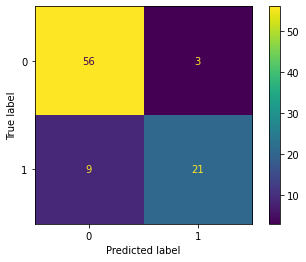

In [68]:
cm = confusion_matrix(y_test, rnd_model_test, labels=rnd_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rnd_model.classes_)

disp.plot()
plt.show()

In [69]:
# Sesudah
model_rnd = grid_search_rnd.best_estimator_

model_rnd.fit(X_train, y_train)

model_train_rnd = model_rnd.predict(X_train)
model_test_rnd = model_rnd.predict(X_test)

print('='*20,'TRAINING','='*20)
print(classification_report(y_train, model_train_rnd))
print('='*20,'TESTING','='*20)
print(classification_report(y_test, model_test_rnd))

==================== TRAINING ====================
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       140
           1       0.83      0.80      0.81        65

    accuracy                           0.88       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.88      0.88      0.88       205

==================== TESTING ====================
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.82      0.77      0.79        30

    accuracy                           0.87        89
   macro avg       0.85      0.84      0.85        89
weighted avg       0.86      0.87      0.86        89



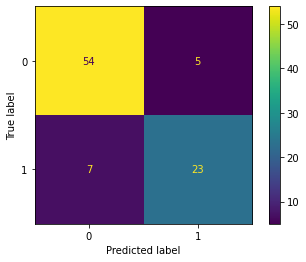

In [70]:
cm = confusion_matrix(y_test, model_test_rnd, labels=rnd_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rnd_model.classes_)

disp.plot()
plt.show()

 > Berdasarkan perbandingan performansi antara model Random Forest sebelum dan sesudah dilakukan Hyperparameter Tuning dapat diinterpretasi sebagai berikut:

- Dilihat dari nilai recall, model random forest sesudah hyperparameter tuning lebih baik dibandingkan sebelum hyperparameter tuning, dikarnakan pada sebelum tuning nilai recall pada testing yaitu sebesar 0.70 sedangkan setelah tuning nilai recall testing yaitu sebesar 0.77. Akan tetapi baik sebelum dan setelah tuning memiliki model yang overfit

- Berdasarkan model random forest hasil hyperparameter tuning memiliki nilai recall pada testing yaitu sebesar 0.77 atau sebesar 77% yang berarti model dapat memprediksi dengan benar terhadap pasien yang meninggal selama follow-up period sebesar 77% dan melakukan kesalahan prediksi sebesar 23%. Dimana dari 30 pasien dapat diprediksi dengan tepat bawha terdapat 23 pasien yang meninggal selama follow-up period dan 7 diprediksi tidak tepat atau kesalahan negatif

- Dari penjabaran diatas, model yang didapatkan sudah termasuk baik, akan tetapi pada kasus ini sangat fatal jika dilakukan kesalahan prediksi, yang menyebabkan model harus sekecil mungkin melakukan kesalahan negatif. Sehingga perlu dilakukan perbaikan model atau perbaikan saat data prepocessing seperti handling imbalance

**AdaBoost**

In [73]:
# Sebelum
ada_model_train = ada_model.predict(X_train)
ada_model_test = ada_model.predict(X_test)

print('='*20,'TRAINING','='*20)
print(classification_report(y_train, ada_model_train))
print('='*20,'TESTING','='*20)
print(classification_report(y_test, ada_model_test))

==================== TRAINING ====================
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       140
           1       0.93      0.88      0.90        65

    accuracy                           0.94       205
   macro avg       0.94      0.92      0.93       205
weighted avg       0.94      0.94      0.94       205

==================== TESTING ====================
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        59
           1       0.71      0.67      0.69        30

    accuracy                           0.80        89
   macro avg       0.78      0.77      0.77        89
weighted avg       0.80      0.80      0.80        89



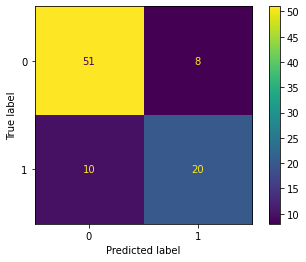

In [72]:
cm = confusion_matrix(y_test, ada_model_test, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_model.classes_)

disp.plot()
plt.show()

In [74]:
# Sesudah
model_ada = grid_search_ada.best_estimator_

model_ada.fit(X_train, y_train)

model_train_ada = model_ada.predict(X_train)
model_test_ada = model_ada.predict(X_test)

print('='*20,'TRAINING','='*20)
print(classification_report(y_train, model_train_ada))
print('='*20,'TESTING','='*20)
print(classification_report(y_test, model_test_ada))

==================== TRAINING ====================
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.90      0.83      0.86        65

    accuracy                           0.92       205
   macro avg       0.91      0.89      0.90       205
weighted avg       0.92      0.92      0.92       205

==================== TESTING ====================
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        59
           1       0.81      0.70      0.75        30

    accuracy                           0.84        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.84      0.84      0.84        89



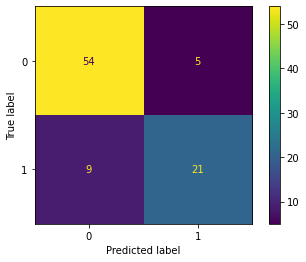

In [75]:
cm = confusion_matrix(y_test, model_test_ada, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_model.classes_)

disp.plot()
plt.show()

 > Berdasarkan perbandingan performansi antara model Adaboost sebelum dan sesudah dilakukan Hyperparameter Tuning dapat diinterpretasi sebagai berikut:

- Dilihat dari nilai recall, model adaboost sesudah hyperparameter tuning lebih baik dibandingkan sebelum hyperparameter tuning, dikarnakan pada sebelum tuning nilai recall pada testing yaitu sebesar 0.67 sedangkan setelah tuning nilai recall testing yaitu sebesar 0.70. Akan tetapi baik sebelum dan setelah tuning memiliki model yang overfit

- Berdasarkan model adaboost hasil hyperparameter tuning memiliki nilai recall pada testing yaitu sebesar 0.70 atau sebesar 70% yang berarti model dapat memprediksi dengan benar terhadap pasien yang meninggal selama follow-up period sebesar 70% dan melakukan kesalahan prediksi sebesar 30%. Dimana dari 30 pasien dapat diprediksi dengan tepat bawha terdapat 21 pasien yang meninggal selama follow-up period dan 9 diprediksi tidak tepat atau kesalahan negatif

- Dari penjabaran diatas sama seperti model random forest, model yang didapatkan sudah termasuk baik, akan tetapi pada kasus ini sangat fatal jika dilakukan kesalahan prediksi, yang menyebabkan model harus sekecil mungkin melakukan kesalahan negatif. Sehingga perlu dilakukan perbaikan model atau perbaikan saat data prepocessing seperti handling imbalance

# **8. Model Inference**

In [76]:
inf = df_inf
inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,1,81,0,38,1,368000.000,4.000,131,1,1,10,1
1,65.000,0,198,1,35,1,281000.000,0.900,137,1,1,146,0
2,65.000,0,56,0,25,0,237000.000,5.000,130,0,0,207,0
3,53.000,1,707,0,38,0,330000.000,1.400,137,1,1,209,0
4,75.000,0,582,0,40,0,263358.030,1.180,137,1,0,107,0


#### **Handling Outlier**

In [77]:
# capping outlier
inf = wins.transform(inf)
inf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000,1,81,0,38,1,368000.000,2.900,131.000,1,1,10,1
1,65.000,0,198,1,35,1,281000.000,0.900,137.000,1,1,146,0
2,65.000,0,56,0,25,0,237000.000,2.900,130.000,0,0,207,0
3,53.000,1,707,0,38,0,330000.000,1.400,137.000,1,1,209,0
4,75.000,0,582,0,40,0,263358.030,1.180,137.000,1,0,107,0


### **Feature Selection**

In [78]:
inf_cleaned = inf[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']].reset_index()
inf_cleaned

,index,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,75.000,38,2.900,131.000,10,1
1,1,65.000,35,0.900,137.000,146,0
2,2,65.000,25,2.900,130.000,207,0
3,3,53.000,38,1.400,137.000,209,0
4,4,75.000,40,1.180,137.000,107,0


### **Feature Scaling**

In [79]:
num_col = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']

num_scaled = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned, num_scaled], axis=1)

inf_cleaned = inf_cleaned[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']]

inf_cleaned

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.636,0.429,1.000,0.414,0.021,1
1,0.455,0.375,0.167,0.621,0.505,0
2,0.455,0.196,1.000,0.379,0.722,0
3,0.236,0.429,0.375,0.621,0.730,0
4,0.636,0.464,0.283,0.621,0.367,0


### **Predict**

In [80]:
X_inf = inf_cleaned.drop('DEATH_EVENT',axis=1).copy()

In [81]:
X_inf_pred_rnd = model_rnd.predict(X_inf)
X_inf_pred_rnd

array([1, 0, 1, 0, 0])

In [82]:
X_inf_pred_ada = model_ada.predict(X_inf)
X_inf_pred_ada

array([1, 0, 1, 0, 0])

> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model yang sudah dilakukan hyperparameter tuning, dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **9. Conceptual Problems** 

**1. Apakah yang dimaksud dengan Bagging?**

> Bagging adalah teknik Ensemble Learning yang bertujuan untuk mengurangi error learning melalui implementasi sekumpulan algoritma machine learning yang homogeneous (cth. Random Forest terdiri dari algoritma decision tree). intinya, bagging menggunakan beberapa base learners (contohnya decision tree) yang di train secara terpisah dengan random sample dari training set. Dengan menggunakan voting atau mengambil rerata dari hasil nya akan menghsilkan model yang akurat dan stabil.

**2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?**

> Algoritma Random Forest adalah metode ensemble learning bagging untuk klasifikasi dan regresi yang beroperasi dengan membangun beberapa decision tree yang **independen** (menggunakan bootstrap yaitu sampling acak dengan penggantian) dan hasil ouput nya dengan cara mengambil keputusan terbanyak dari semua hasil prediksi sebagai final output. 

> Sedangkan algoritma Boosting adalah metode ensemble learning yang beroperasi dengan membangun beberapa decision tree yang **dependent**. Dengan mencoba untuk mengimprove atau mengoreksi kesalahan pada base learner sebelumnya.

# **10. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:
1. Pada Graded Challenge ini dilakukan pembuatan model machine learning Classification menggunakan Random Forest dan salah satu algoritma boosting yaitu adaboost untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah diperoleh. Dimana dataset yang digunakan terdiri dari 299 entri data atau baris dan 13 kolom

2. Pada Graded Challenge ini akan difokuskan pada nilai recall yaitu mengurangi kesalahan negatif yang mana label 1 pada kolom DEATH_EVENT didefinisikan sebagai kelas positif dan label 1 memiliki arti pasien yang meninggal selama follow-up period. Sehingga kesalahan fatal jika prediksi yang seharusnya diprediksi sebagai label 1 malah diprediksi label 0.

2. Berdasarkan EDA - Modeling pada data training dilakukan capping terhadap kolom yang memiliki outlier dibawah 5%, yang mana kolom yang memiliki outlier dibawah 5% adalah kolom `platelets` , `serum_creatinine` dan `serum_sodium` dan berdasarkan EDA - Modeling ditetapkan feature yang digunakan untuk tahap pemodelan dari hasil feature selection menggunakan correlation heatmap dengan threshold 0.1, sehingga diperoleh feature sebagai berikut: `age`,`ejection_fraction`,`serum_creatinine`, `serum_sodium`, `time` dan `DEATH_EVENT` sebagai target

3. Pada model definition terdapat dua model yang digunakan yaitu model:
> - Random Forest
> - AdaBoost

4. Dari model diatas, akan dilakukan perbandingan performa disetiap masing - masing model, antara model sebelum atau parameter default (baseline model) dan sesudah dilakukan Hyperparameter Tuning.

5. Diperoleh parameter terbaik dari model random forest berdasarkan hyperparameter tuning adalah sebagai berikut:
> - criterion = 'entropy'
> - max_depth = 3
> - max_features = 5
> - n_estimators = 40

6. Sedangkan pada model adaboost diperoleh parameter terbaik berdasarkan hyperparameter tuning adalah sebagai berikut:
> - algorithm = 'SAMME.R'
> - base_estimator = DecisionTreeClassifier(max_depth=3)
> - learning_rate = 0.01
> - n_estimators = 15

7. Berdasarkan classification_report antara sebelum dan sesudah hyperparameter tuning pada model random forest dapat diinterpetasikan sebagai berikut:

> - Dilihat dari nilai recall, model random forest sesudah hyperparameter tuning lebih baik dibandingkan sebelum hyperparameter tuning, dikarnakan pada sebelum tuning nilai recall pada testing yaitu sebesar 0.70 sedangkan setelah tuning nilai recall testing yaitu sebesar 0.77. Akan tetapi baik sebelum dan setelah tuning memiliki model yang overfit

> - Berdasarkan model random forest hasil hyperparameter tuning memiliki nilai recall pada testing yaitu sebesar 0.77 atau sebesar 77% yang berarti model dapat memprediksi dengan benar terhadap pasien yang meninggal selama follow-up period sebesar 77% dan melakukan kesalahan prediksi sebesar 23%. Dimana dari 30 pasien dapat diprediksi dengan tepat bawha terdapat 23 pasien yang meninggal selama follow-up period dan 7 diprediksi tidak tepat atau kesalahan negatif

8. Berdasarkan classification_report antara sebelum dan sesudah hyperparameter tuning pada model adaboost dapat diinterpetasikan sebagai berikut:

> - Dilihat dari nilai recall, model adaboost sesudah hyperparameter tuning lebih baik dibandingkan sebelum hyperparameter tuning, dikarnakan pada sebelum tuning nilai recall pada testing yaitu sebesar 0.67 sedangkan setelah tuning nilai recall testing yaitu sebesar 0.70. Akan tetapi baik sebelum dan setelah tuning memiliki model yang overfit

> - Berdasarkan model adaboost hasil hyperparameter tuning memiliki nilai recall pada testing yaitu sebesar 0.70 atau sebesar 70% yang berarti model dapat memprediksi dengan benar terhadap pasien yang meninggal selama follow-up period sebesar 70% dan melakukan kesalahan prediksi sebesar 30%. Dimana dari 30 pasien dapat diprediksi dengan tepat bawha terdapat 21 pasien yang meninggal selama follow-up period dan 9 diprediksi tidak tepat atau kesalahan negatif

9. Berdasarkan nilai recall pada model random forest dan model adaboost, model rendom forest lebih baik dibandingkan model adaboost dikarnakan model random forest dapat memprediksi dengan benar terhadap pasien yang meninggal selama follow-up period sebesar 77% sedangkah model adaboost hanya dapat memprediksi dengan benar sebesar 70%

10. Dari penjabaran diatas, model yang didapatkan sudah termasuk baik, akan tetapi pada kasus ini sangat fatal jika dilakukan kesalahan prediksi, oleh sebab itu model harus sekecil mungkin melakukan kesalahan negatif. Sehingga perlu dilakukan perbaikan model atau perbaikan saat data prepocessing seperti handling imbalance